In [36]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [37]:
df=TabularDataset('/content/innovize_final_ml.csv')

Loaded data from: /content/innovize_final_ml.csv | Columns = 10 / 10 | Rows = 6000 -> 6000


In [38]:
df

,phy_fitness,diet_pref,act_level,sleep_hrs,mindfulness,career,gender,daily_avg_steps,daily_avg_calories,is_healthy
0,3.0,Vegan,Sedentary,7,10,Artist,1.0,2020.0,1831.0,0
1,4.0,Vegan,Lightly Active,7,1,Teacher,0.0,5154.0,2190.0,0
2,8.0,Vegetarian,Active,8,10,Freelancer,1.0,12363.0,2297.0,1
3,2.0,Pescatarian,Sedentary,8,7,Doctor,0.0,1664.0,1943.0,0
4,9.0,Pescatarian,Highly Active,5,7,Business,0.0,17680.0,3527.0,1
...,...,...,...,...,...,...,...,...,...,...
5995,7.0,Keto,Active,7,8,Scientist,1.0,14373.0,2663.0,1
5996,2.0,Keto,Sedentary,5,4,Artist,1.0,4484.0,2080.0,0
5997,2.0,Keto,Sedentary,7,7,Doctor,1.0,2670.0,1941.0,0
5998,7.0,Vegan,Active,9,2,Engineer,1.0,11982.0,2837.0,0


In [39]:
df=df.dropna()

# Pre-processing

In [58]:
labels_1=df["act_level"].unique()

In [59]:
labels_1

array([4, 3, 2, 1], dtype=object)

In [ ]:
labels_1=df["act_level"].unique()

In [61]:
labels_2=df["diet_pref"].unique()

In [62]:
labels_2

array(['Vegan', 'Vegetarian', 'Pescatarian', 'Keto', 'Non-Vegetarian'],
      dtype=object)

In [43]:
df.loc[df["act_level"]=="Highly Active","act_level"]=1
df.loc[df["act_level"]=="Active","act_level"]=2
df.loc[df["act_level"]=="Lightly Active","act_level"]=3
df.loc[df["act_level"]=="Sedentary","act_level"]=4

In [44]:
label='is_healthy'

In [45]:
train_data=df.sample(frac=0.8,random_state=0)
test_data=df.drop(train_data.index)

In [46]:
df[label].describe()

,is_healthy
count,5964.000000
mean,0.315728
std,0.464844
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#Fitting Model

In [47]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20250214_053247"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.44 GB / 12.67 GB (82.4%)
Disk Space Avail:   78.40 GB / 112.64 GB (69.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

In [48]:
y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

,is_healthy
0,0
7,0
21,1
24,0
25,1


# Evaluation

In [49]:
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.9924559932942163,
 'balanced_accuracy': 0.9922246047173404,
 'mcc': 0.98212952477977,
 'roc_auc': 0.9992852514645665,
 'f1': 0.9875173370319001,
 'precision': 0.9834254143646409,
 'recall': 0.9916434540389972}

In [50]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,0.996008,accuracy,0.004322,0.523823,0.004322,0.523823,1,True,4
1,WeightedEnsemble_L2,0.996008,accuracy,0.005479,0.686810,0.001157,0.162986,2,True,14
2,NeuralNetFastAI,0.996008,accuracy,0.011471,3.972364,0.011471,3.972364,1,True,10
3,CatBoost,0.994012,accuracy,0.002664,2.859347,0.002664,2.859347,1,True,7
4,XGBoost,0.994012,accuracy,0.008637,0.514463,0.008637,0.514463,1,True,11
5,NeuralNetTorch,0.994012,accuracy,0.008991,15.416314,0.008991,15.416314,1,True,12
6,ExtraTreesEntr,0.994012,accuracy,0.065843,0.766119,0.065843,0.766119,1,True,9
7,LightGBMLarge,0.990020,accuracy,0.004462,1.068186,0.004462,1.068186,1,True,13
8,LightGBMXT,0.986028,accuracy,0.007100,0.664149,0.007100,0.664149,1,True,3
9,RandomForestGini,0.986028,accuracy,0.065323,1.005944,0.065323,1.005944,1,True,5


### Checking feature importance


In [51]:
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 9 features using 1193 rows with 5 shuffle sets...
	0.76s	= Expected runtime (0.15s per shuffle set)
	0.28s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
phy_fitness,0.198156,0.013406,2.498887e-06,5,0.225760,0.170552
mindfulness,0.173345,0.011016,1.946386e-06,5,0.196026,0.150663
sleep_hrs,0.085666,0.003476,3.246995e-07,5,0.092824,0.078509
daily_avg_steps,0.073931,0.005147,2.800197e-06,5,0.084528,0.063334
daily_avg_calories,0.012406,0.001499,2.512012e-05,5,0.015493,0.009318
gender,0.000503,0.000459,3.524200e-02,5,0.001448,-0.000442
act_level,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
diet_pref,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
career,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000


# Plotting Decision Boundary

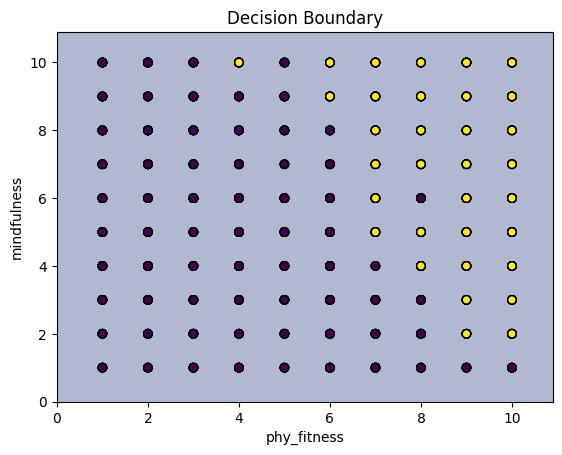

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = test_data[['phy_fitness', 'mindfulness']].values
y = test_data[label].values


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['phy_fitness', 'mindfulness'])


features = predictor.feature_metadata_in.get_features()


for feature in features:
    if feature not in mesh_data.columns:
        mesh_data[feature] = 0


Z = predictor.predict(mesh_data).values
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('phy_fitness')
plt.ylabel('mindfulness')
plt.title('Decision Boundary')
plt.show()

In [64]:
predictor.save("my_final_model.pkl")